# DSC 106: Final Project

## Pokemon Data Viz

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns

# For Data Visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Configure Visualizations
%matplotlib inline
sns.set_style('white')

In [2]:
pokemon = pd.read_csv('Pokemon.csv')
pokemon.head()

#           Name  Type1   Type2  Total  HP  Attack  Defense  SpAtk  SpDef  \
0  1      Bulbasaur  Grass  Poison    318  45      49       49     65     65   
1  2        Ivysaur  Grass  Poison    405  60      62       63     80     80   
2  3       Venusaur  Grass  Poison    525  80      82       83    100    100   
3  3  Mega Venusaur  Grass  Poison    625  80     100      123    122    120   
4  4     Charmander   Fire     NaN    309  39      52       43     60     50   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False

In [3]:
# Name : Name of the Pokemon
# Type 1 : First ability
# Type 2 : Second ability
# Total : Sum of all power points
# HP : Health Points
# Attack : Attack points
# Defense : Defense points
# Sp. Atk : Speed points on attack
# Sp. Def : Speed points on defense
# Speed : Speed points
# Generation : Number of generation
# Legendary : True whether it is a legendary character or not
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type1       800 non-null    object
 3   Type2       414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   SpAtk       800 non-null    int64 
 9   SpDef       800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
print('There are', len(pokemon['#'].unique()), 'Pokemon in the dataset.', '\n')
print('The dataset covers', len(pokemon['Generation'].unique()), 'Generations.', '\n')
print(
    "Each Pokemon's stats are split among 6 statistics: \n",
    '      HP, Attack, Defense, Special Attack, Special Defense, Speed.', '\n')
print('There are', sum(pokemon['Legendary']), 'Legendary Pokemon.')

There are 721 Pokemon in the dataset. 

The dataset covers 6 Generations. 

Each Pokemon's stats are split among 6 statistics: 
       HP, Attack, Defense, Special Attack, Special Defense, Speed. 

There are 65 Legendary Pokemon.


**Disclaimer:**
The effectiveness chart is not mine.
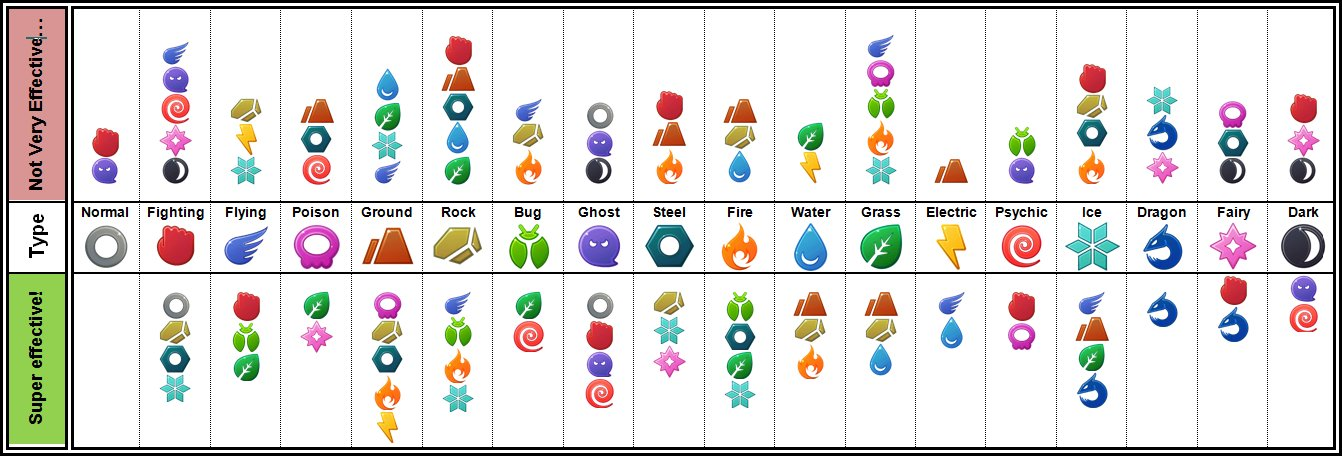
I got it here:
https://twitter.com/PokemonGOHubNet/status/852238162139136000/photo/1
Credit goes to whoever originally made it.

In [5]:
# Pokemon colors set to reflect their visuals in game
colors = {
    "Bug": "#A6B91A",
    "Dark": "#705746",
    "Dragon": "#6F35FC",
    "Electric": "#F7D02C",
    "Fairy": "#D685AD",
    "Fighting": "#C22E28",
    "Fire": "#EE8130",
    "Flying": "#A98FF3",
    "Ghost": "#735797",
    "Grass": "#7AC74C",
    "Ground": "#E2BF65",
    "Ice": "#96D9D6",
    "Normal": "#A8A77A",
    "Poison": "#A33EA1",
    "Psychic": "#F95587",
    "Rock": "#B6A136",
    "Steel": "#B7B7CE",
    "Water": "#6390F0",
}
type_colors = np.array(list(colors.values()))

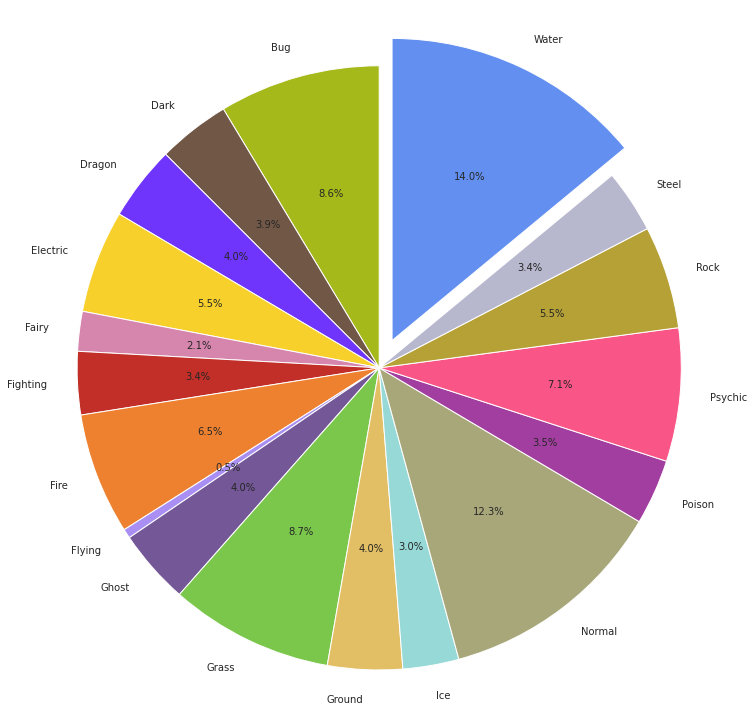

In [6]:
pokemon_types = pokemon.groupby('Type1').count()
# Create a list of colors based on the default colors of each pokemon type
plt.figure(figsize=(10, 10))

# Create a pie chart
plt.pie(
    pokemon.groupby('Type1').size(),
    labels=pokemon_types.index,
    shadow=False,
    colors=type_colors,
    explode=(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1),
    startangle=90,
    autopct='%1.1f%%',
    )

# plt.title('Distribution of Primary Type')
plt.axis('equal')
plt.tight_layout()
plt.show()

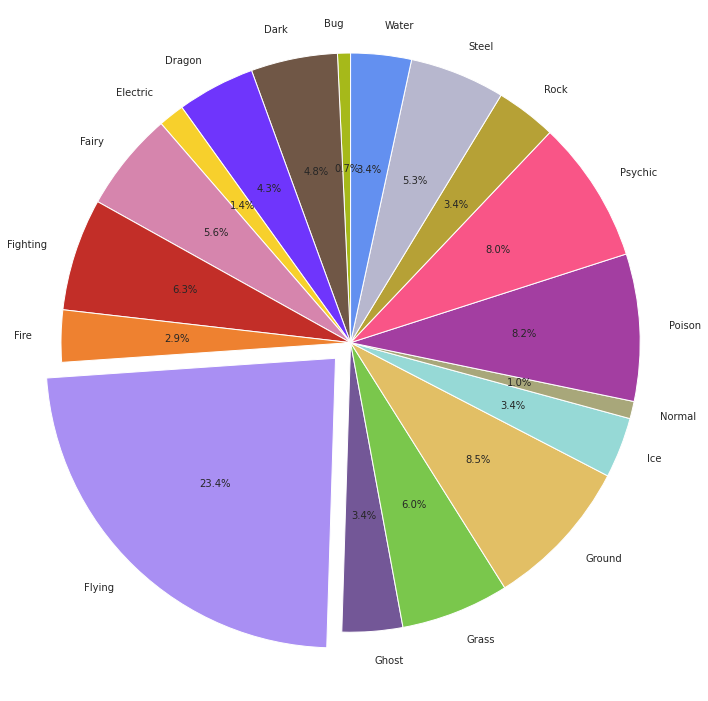

In [7]:
pokemon_types = pokemon.groupby('Type2').count()
# Create a list of colors based on the default colors of each pokemon type
plt.figure(figsize=(10, 10))

# Create a pie chart
plt.pie(
    pokemon.groupby('Type2').size(),
    labels=pokemon_types.index,
    shadow=False,
    colors=type_colors,
    explode=(0,0,0,0,0,0,0,0.075,0,0,0,0,0,0,0,0,0,0),
    startangle=90,
    autopct='%1.1f%%',
    )

# plt.title('Distribution of Secondary Type')
plt.axis('equal')
plt.tight_layout()
plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

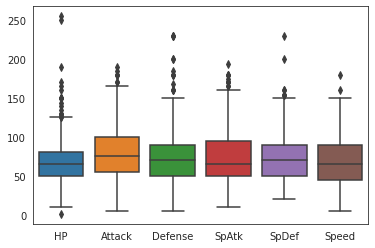

In [8]:
pokemon_fight_attributes = pokemon.drop(["#","Total","Generation", "Legendary"], axis = 1)
sns.boxplot(data = pokemon_fight_attributes)
sns.plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



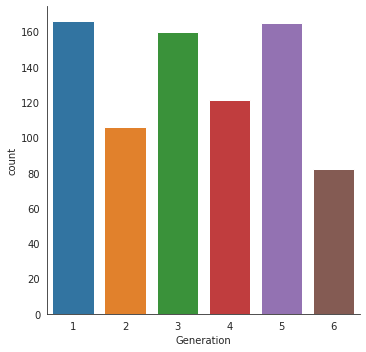

In [9]:
sns.factorplot(x='Generation',kind='count',data=pokemon,size=5,aspect=1)

In [10]:
pokemon['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

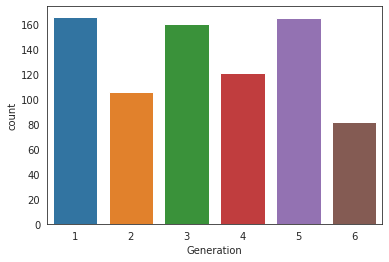

In [11]:
sns.countplot(pokemon['Generation'])

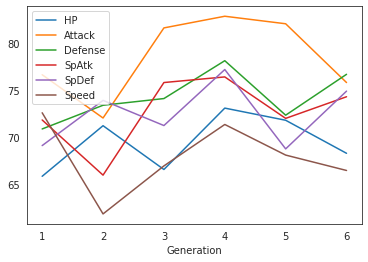

In [12]:
pokemon.groupby('Generation').mean()[['HP','Attack','Defense','SpAtk','SpDef','Speed']].plot.line()

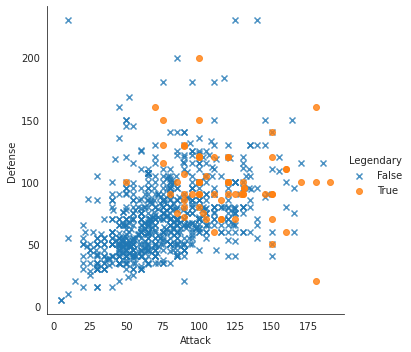

In [13]:
sns.lmplot(x='Attack', y='Defense', hue='Legendary', fit_reg=False, data=pokemon, markers = ['x', 'o'])

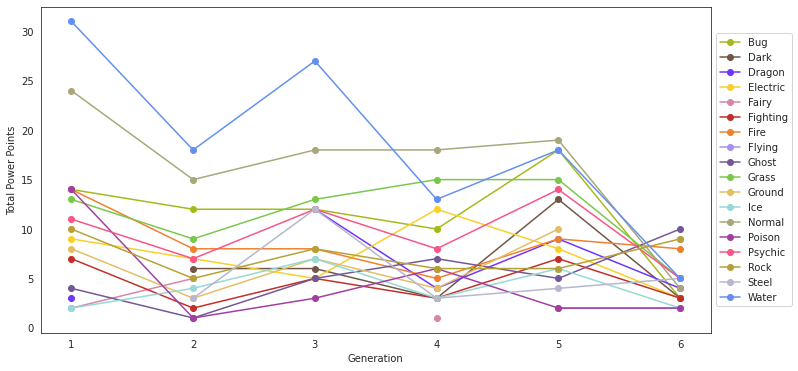

In [14]:
a=pokemon.groupby(['Generation','Type1']).count().reset_index()
a=a[['Generation','Type1','Total']]
a=a.pivot('Generation','Type1','Total')
a.plot(color=type_colors,marker='o') #order does not match
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.ylabel('Total Power Points')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

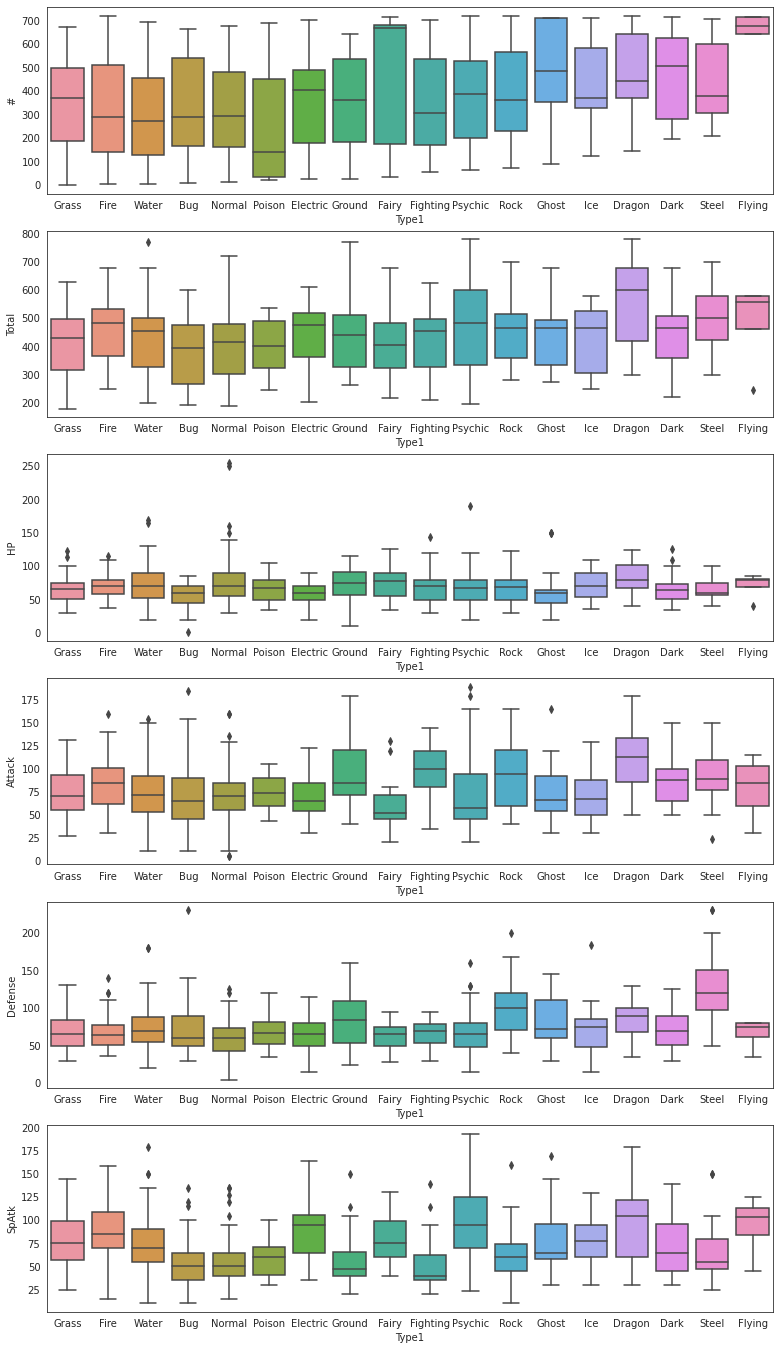

In [15]:
var_int = pokemon.dtypes[pokemon.dtypes=='int64'].index
fig = plt.figure(figsize=(13,24))
for i,col in enumerate(var_int[:6]):
    ax1 = fig.add_subplot(6,1,i+1)
    sns.boxplot(x=pokemon['Type1'], y=pokemon[col], ax=ax1)       
plt.show()

In [16]:
# Radar/Polar/Spiderweb

def polar_pokemon_stats(pkmn_name):
    pkmn = pokemon[pokemon.Name == pkmn_name]
    obj = go.Scatterpolar(
        r=[
            pkmn['HP'].values[0],
            pkmn['Attack'].values[0],
            pkmn['Defense'].values[0],
            pkmn['SpAtk'].values[0],
            pkmn['SpDef'].values[0],
            pkmn['Speed'].values[0],
            pkmn['HP'].values[0]
        ],
        theta=[
            'HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed', 'HP'
        ],
        fill='toself',
        marker=dict(
            color=colors[pkmn['Type1'].values[0]]
        ),
        name=pkmn['Name'].values[0]
    )

    return obj


def plot_single_pokemon(name):
    layout = go.Layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 250]
            )
        ),
        showlegend=False,
        title="Stats of {}".format(name)
    )

    pokemon_figure = go.Figure(data=[polar_pokemon_stats(name)], layout=layout)
    
    iplot(pokemon_figure, filename='Single Pokemon')


In [17]:
name = 'Charmander'
plot_single_pokemon(name)

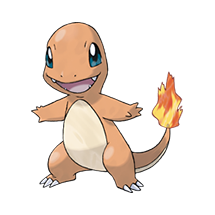

In [18]:
def get_img(name):
    num = pokemon[pokemon['Name'] == name]['#'].iloc[0]
    baseURL = "https://assets.pokemon.com/assets/cms2/img/pokedex/detail/"
    endURL = ".png"
    num = str(num)
    try:
        if len(num) == 1:
            num = "00" + num
        elif len(num) == 2:
            num = "0" + num
        combinedURL = baseURL + num + endURL
        return combinedURL
    except:
        print("Failed to display pokemon: " + name)
    return

import IPython
url = get_img(name)
IPython.display.Image(url, width = 250)

In [19]:
# Comparing stats of 2 different pokemons
pkmn_1_name = 'Kyogre'
pkmn_2_name = 'Entei'

layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 250]
        )
    ),
    showlegend=True,
    title="{} vs. {}".format(pkmn_1_name, pkmn_2_name)
)

pkmn_1 = polar_pokemon_stats(pkmn_1_name)
pkmn_2 = polar_pokemon_stats(pkmn_2_name)

compare_2_pokemon = go.Figure(data=[pkmn_1, pkmn_2], layout=layout)
iplot(compare_2_pokemon, filename='Compare 2 Pokemon')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f32bf4309e8>,
      dtype=object)

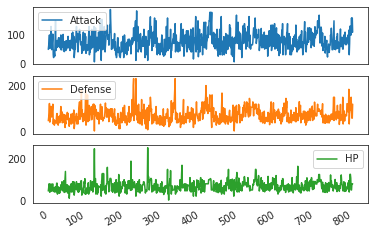

In [20]:
data1 = pokemon[['Attack','Defense','HP']]
# data1.plot()
data1.plot(subplots=True)